This simulation aims to show some unexpected results on the motoneuron spike times when the Renshaw cell is present.

In [13]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [14]:
def simulator_old_RC(numberS, numberFR, numberFF, numberRC, duration):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Parameters from java
    ## Connectivity
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100

    ## Conductances
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.3
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.24
    idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.17
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.3

    ## Morphology
    idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 65
    conf.confArray['f2'][idx] = 65
    idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 285
    conf.confArray['f2'][idx] = 285
    idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 200
    conf.confArray['f2'][idx] = 200
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Corrent injectada no soma dos MNs
        for j in xrange(1, len(pools[0].iInjected), 2):
            pools[0].iInjected[j] = 10
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool

    pools[0].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1

In [15]:
def simulator_old_noRC(numberS, numberFR, numberFF, numberRC, duration):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Parameters from java
    ## Connectivity
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100
    idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 100

    ## Conductances
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.3
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.24
    idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.17
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.3

    ## Morphology
    idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 65
    conf.confArray['f2'][idx] = 65
    idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 285
    conf.confArray['f2'][idx] = 285
    idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 200
    conf.confArray['f2'][idx] = 200
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Corrent injectada no soma dos MNs
        for j in xrange(1, len(pools[0].iInjected), 2):
            pools[0].iInjected[j] = 10
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool

    pools[0].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1

In [16]:
def simulator_new_RC(numberS, numberFR, numberFF, numberRC, duration):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Parameters from Python
    ## Connectivity
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6
    idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6
    idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6

    ## Conductances
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15

    ## Morphology
    idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 25
    conf.confArray['f2'][idx] = 25
    idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 242
    conf.confArray['f2'][idx] = 242
    idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 760
    conf.confArray['f2'][idx] = 760
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Corrent injectada no soma dos MNs
        for j in xrange(1, len(pools[0].iInjected), 2):
            pools[0].iInjected[j] = 10
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[2].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool

    pools[0].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1

In [17]:
def simulator_new_noRC(numberS, numberFR, numberFF, numberRC, duration):

    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Parameters from Python
    ## Connectivity
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 4
    idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6
    idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6
    idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 6

    ## Conductances
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
    conf.confArray['f1'][idx] = 0.44
    idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15
    idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = 0.15

    ## Morphology
    idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 25
    conf.confArray['f2'][idx] = 25
    idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 242
    conf.confArray['f2'][idx] = 242
    idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
    conf.confArray['f1'][idx] = 760
    conf.confArray['f2'][idx] = 760
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        # Corrent injectada no soma dos MNs
        for j in xrange(1, len(pools[0].iInjected), 2):
            pools[0].iInjected[j] = 10
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool

    pools[0].listSpikes()

    return pools[0].poolSomaSpikes[:, 0], pools[0].poolSomaSpikes[:, 1]+1

In [38]:
nS = 800
nFR = 50
nFF = 50
nRC = 350
t =200

spikeTimes_old_RC, spikingMN_old_RC = simulator_old_RC(nS, nFR, nFF, nRC, t)
spikeTimes_old_noRC, spikingMN_old_noRC = simulator_old_noRC(nS, nFR, nFF, nRC, t)
spikeTimes_new_RC, spikingMN_new_RC = simulator_new_RC(nS, nFR, nFF, nRC, t)
spikeTimes_new_noRC, spikingMN_new_noRC = simulator_new_noRC(nS, nFR, nFF, nRC, t)

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 630000 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 0 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
All the 31560 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
All the 0 synapses were built
Synaptic Noise on RC_ext built
All the 0 synaptic noises were built


<IPython.core.display.Javascript object>


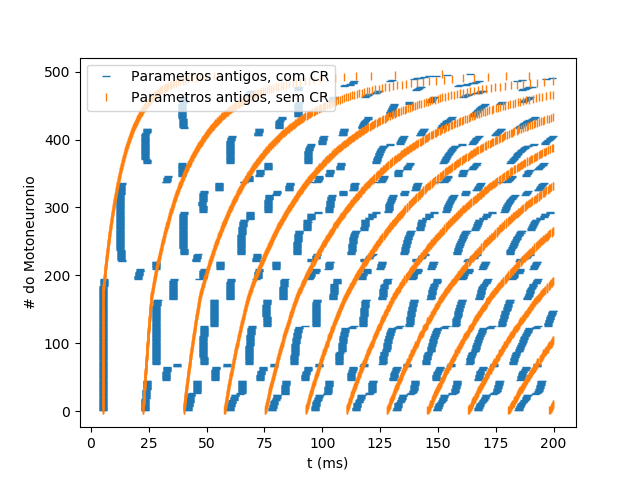

In [40]:
plt.figure()
plt.plot(spikeTimes_old_RC, spikingMN_old_RC, '_', label = "Parametros antigos, com CR")
plt.plot(spikeTimes_old_noRC, spikingMN_old_noRC, '|', label = "Parametros antigos, sem CR")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Motoneuronio')
plt.show()

<IPython.core.display.Javascript object>


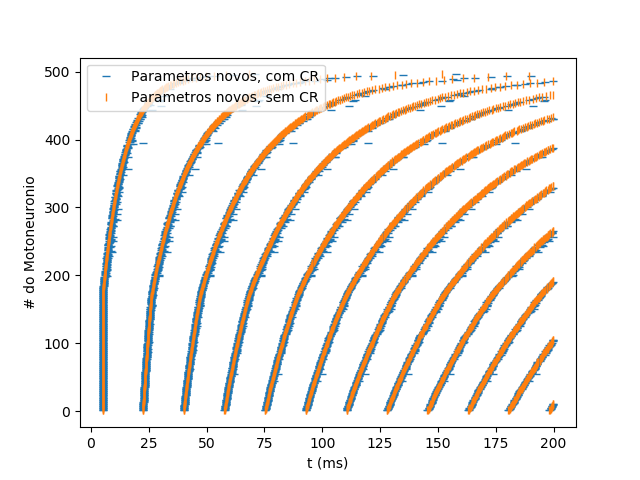

In [41]:
plt.figure()
plt.plot(spikeTimes_new_RC, spikingMN_new_RC, '_', label = "Parametros novos, com CR")
plt.plot(spikeTimes_new_noRC, spikingMN_new_noRC, '|', label = "Parametros novos, sem CR")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Motoneuronio')
plt.show()

<IPython.core.display.Javascript object>


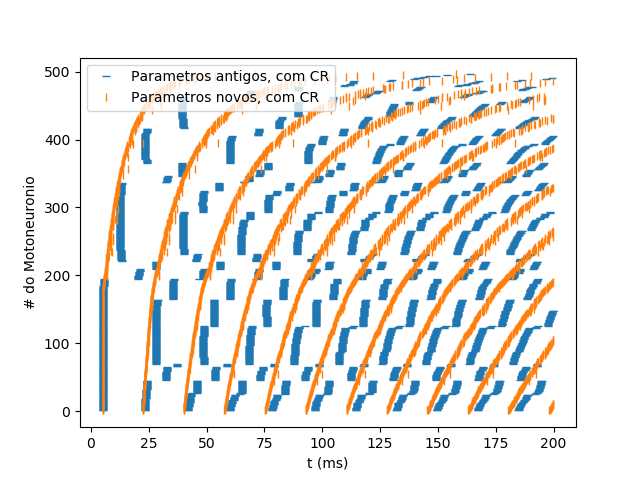

In [42]:
plt.figure()
plt.plot(spikeTimes_old_RC, spikingMN_old_RC, '_', label = "Parametros antigos, com CR")
plt.plot(spikeTimes_new_RC, spikingMN_new_RC, '|', label = "Parametros novos, com CR")
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('# do Motoneuronio')
plt.show()

These simulations, together with the ones from Uchiyama et al. 2003, should bring interesting discussions. With 800, 50, 50, 350 and 200, it took less than 45min.